In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, auc

In [3]:
data = pd.read_csv("../input/school-data/data.csv")
print(data.shape)
data.head()

(1000, 11)


,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


### Data Analysis and Feature Engineering

In [4]:
# checking for null values

data.isnull().sum().to_frame()

,0
type_school,0
school_accreditation,0
gender,0
interest,0
residence,0
parent_age,0
parent_salary,0
house_area,0
average_grades,0
parent_was_in_college,0


In [5]:
numerical_variables = [
    "parent_age", "parent_salary", "house_area", "average_grades"
]

categorical_variables = [
    'type_school', 'school_accreditation', 'gender', 'interest', 'residence',
    'parent_was_in_college'
]

In [6]:
# checking whether data is imabalanced 
data.in_college.value_counts()

True     500
False    500
Name: in_college, dtype: int64

### Checking for Outliers

<AxesSubplot:>

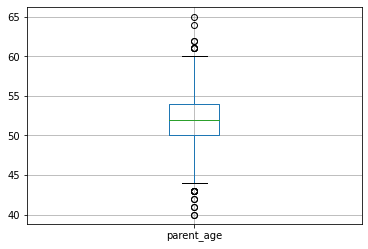

In [7]:
data.boxplot("parent_age",figsize=(5,5))

<AxesSubplot:>

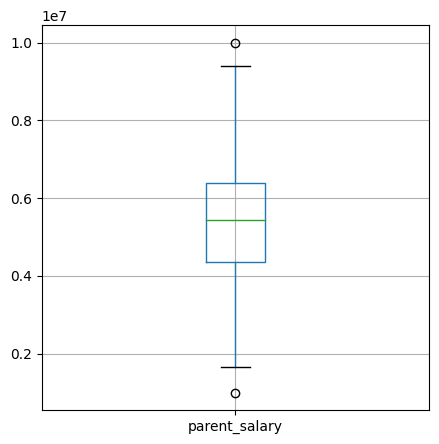

In [8]:
data.boxplot("parent_salary",figsize=(5,5))

<AxesSubplot:>

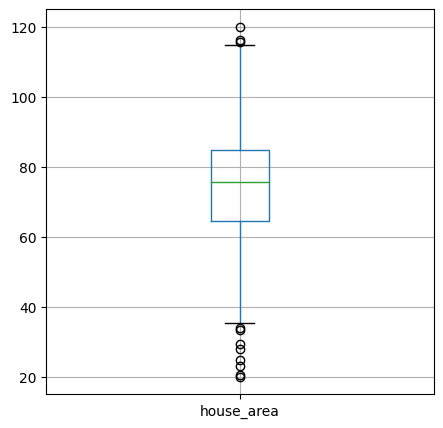

In [9]:
data.boxplot("house_area",figsize=(5,5))

<AxesSubplot:>

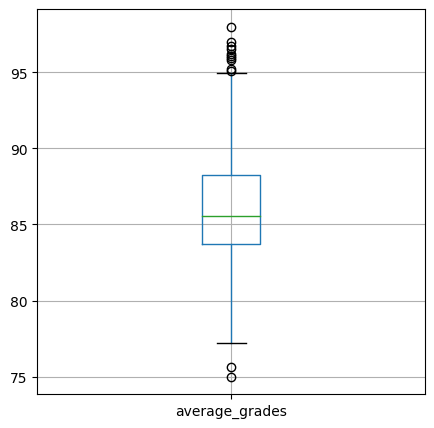

In [10]:
data.boxplot("average_grades",figsize=(5,5))

### Outliers are present, So writing a function to find and remove it using IQR

In [11]:
def iqr_outliers(col):
    
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_band = q1 - 1.5*iqr
    upper_band = q3 + 1.5*iqr
    
    return lower_band, upper_band


In [12]:

%%time
# Lower_band & Upper_band values of Numerical Variables

print("Lower_band & Upper_band values of Numerical Variables \n __________________________________________________________ \n")

for i in numerical_variables:
    
    print(i, ":  ", iqr_outliers(i))
    print(" ")

Lower_band & Upper_band values of Numerical Variables 
 __________________________________________________________ 

parent_age :   (44.0, 60.0)
 
parent_salary :   (1326250.0, 9416250.0)
 
house_area :   (34.26249999999998, 115.16250000000002)
 
average_grades :   (76.94999999999999, 95.05000000000001)
 
CPU times: user 27.7 ms, sys: 1.18 ms, total: 28.8 ms
Wall time: 28.7 ms


In [13]:
data.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


In [14]:
# checking for unique categories in categorical variables

for col in categorical_variables:
    print(col, ": ", "\n \n",data[col].value_counts(), "\n", "================================")

type_school :  
 
 Academic      609
Vocational    391
Name: type_school, dtype: int64 
school_accreditation :  
 
 B    519
A    481
Name: school_accreditation, dtype: int64 
gender :  
 
 Male      515
Female    485
Name: gender, dtype: int64 
interest :  
 
 Very Interested     324
Uncertain           261
Less Interested     229
Quiet Interested    100
Not Interested       86
Name: interest, dtype: int64 
residence :  
 
 Urban    539
Rural    461
Name: residence, dtype: int64 
parent_was_in_college :  
 
 True     520
False    480
Name: parent_was_in_college, dtype: int64 


In [15]:
# checking whether data is imbalanced 

data.in_college.value_counts()

True     500
False    500
Name: in_college, dtype: int64

In [16]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [17]:
X.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False


In [18]:
%%time
# Applying Label Encoder to categorical data

encoder = LabelEncoder()

for col in categorical_variables:
    
    X[col] = encoder.fit_transform(X[col])

X.head()

CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 9.38 ms


,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
0,0,0,1,0,1,56,6950000,83.0,84.09,0
1,0,0,1,0,1,57,4410000,76.8,86.91,0
2,0,1,0,4,1,50,6500000,80.6,87.43,0
3,1,1,1,4,0,49,6600000,78.2,82.12,1
4,0,0,0,4,1,57,5250000,75.1,86.79,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Building machine learning model

In [20]:
log_reg = LogisticRegression()
svm = SVC()

models = {"Logistic Regression":log_reg, "Support Vector Machine":svm}


for model_name,model in models.items():
    
    
    print(model_name, "\n ==================== \n")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = auc(y_test, y_pred)
    
    print(
        " Accuracy of {} is {}".format(model_name, accuracy), "\n", "Accuracy of {} is {}".format(model_name, auc_score), "\n "
    )

Logistic Regression 

 Accuracy of Logistic Regression is 0.475 
 Accuracy of Logistic Regression is 59.5 
 
Support Vector Machine 

 Accuracy of Support Vector Machine is 0.65 
 Accuracy of Support Vector Machine is 50.0 
 


## The Results are:

 **(1) Logistic Regression:**

  - Accuracy of Logistic Regression is 0.475 
  - Accuracy of Logistic Regression is 59.5 
 
 
 **(2) Support Vector Machine**
  

  - Accuracy of Support Vector Machine is 0.65 
  - Accuracy of Support Vector Machine is 50.0 
 
 
 #### **Notes:**
 
  - Here I have not removed the outliers(Need to remove it and train again)
  - Used Label Encoder to handle categorical data(Can use better encoding techniques)
  - Used simple classifiers - Logistic Regression and Support Vector Machine